In [1]:
import tensorflow as tf

import os

from matplotlib import pyplot as plt

from buildGenerator import buildGenerator

In [38]:
def generate_images(model, test_input):
    prediction = model(test_input, training=True)
    plt.figure(figsize=(15,15))

    display_list = [test_input[0], prediction[0]]
    title = ['Input Image', 'Predicted Image']

    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')
    plt.show()

In [40]:
def normalize(input_image):
    input_image = (input_image / 127.5) - 1
    return input_image

def load(image_file):
    image = tf.io.read_file(image_file)
    image = tf.image.decode_png(image, channels=3)
    input_image = tf.cast(image, tf.float32)
    return input_image

def load_image_test(image_file):
    input_image = load(image_file)
    input_image = normalize(input_image)
    return input_image

In [44]:
example_dataset = tf.data.Dataset.list_files('.\\examples\\*.png')
example_dataset = example_dataset.map(load_image_test)
example_dataset = example_dataset.batch(4)

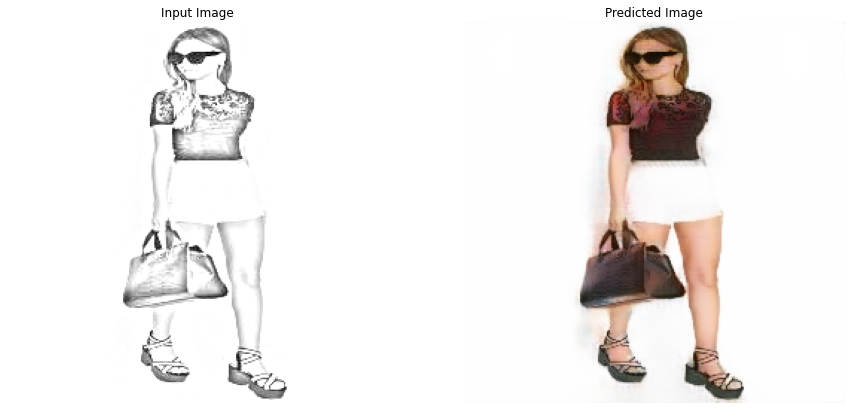

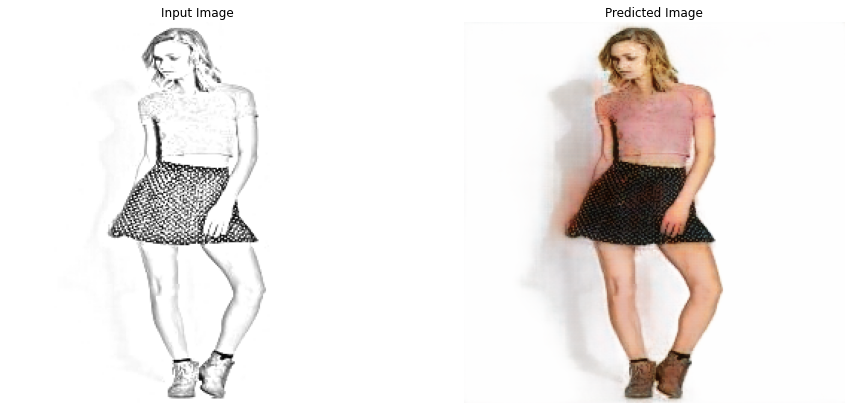

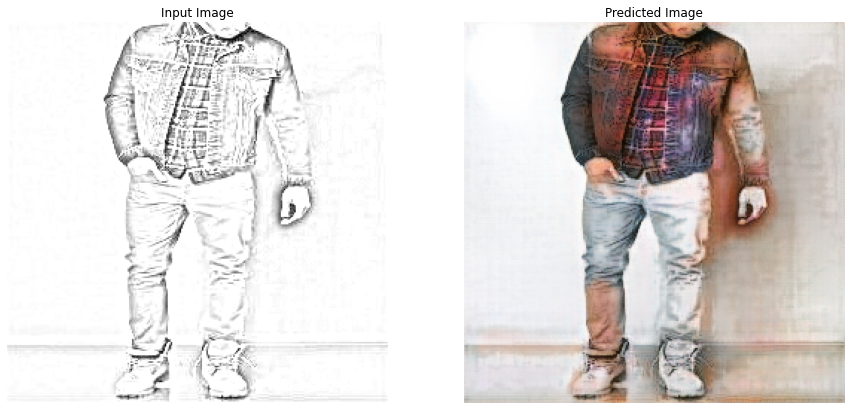

In [45]:
generator = tf.keras.models.load_model("./sketch2Image.h5")
for example_input in example_dataset.take(5):
    generate_images(generator,example_input)